<a href="https://colab.research.google.com/github/caiofrz/sistemas_inteligentes/blob/main/Atividade_An%C3%A1lise_de_Dados_ENEM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [ ]:
!gdown https://s3.sa-east-1.amazonaws.com/update.service.nxvendas.com.br/microdados_enem_2019.zip
!gdown https://drive.google.com/uc?id=1AEKQmq8LNFz3st6SoiEghRp70YTxtP68

Downloading...
From: https://s3.sa-east-1.amazonaws.com/update.service.nxvendas.com.br/microdados_enem_2019.zip
To: /content/microdados_enem_2019.zip
100% 728M/728M [00:34<00:00, 21.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AEKQmq8LNFz3st6SoiEghRp70YTxtP68
To: /content/escolas.csv
100% 82.5M/82.5M [00:00<00:00, 112MB/s]


In [ ]:
columns = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO','CO_ESCOLA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = [7, 7]

In [ ]:
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
    df = pd.read_csv(f,sep=';',encoding='ISO-8859-1', usecols=columns)

In [ ]:
# Lista dos municípios
municipios = ['Jacinto', 'Almenara', 'Rubim', 'Jequitinhonha', 'Joaíma', 'Santa Maria do Salto', 'Pedra Azul']

# Filtrando os inscritos nos municípios
df_municipios = df[df['NO_MUNICIPIO_RESIDENCIA'].isin(municipios) & (df['SG_UF_RESIDENCIA'] == 'MG')]

# Contando a quantidade de participantes por município
df_qtde_participantes = df_municipios['NO_MUNICIPIO_RESIDENCIA'].value_counts()

# Calculando a quantidade total de inscritos
qtde_total = df_qtde_participantes.sum()

print(pd.Series(df_qtde_participantes))
print()
print(f'Total de inscritos: {qtde_total}')


Almenara                918
Jequitinhonha           421
Pedra Azul              315
Joaíma                  199
Jacinto                 192
Rubim                   122
Santa Maria do Salto     64
Name: NO_MUNICIPIO_RESIDENCIA, dtype: int64

Total de inscritos: 2231


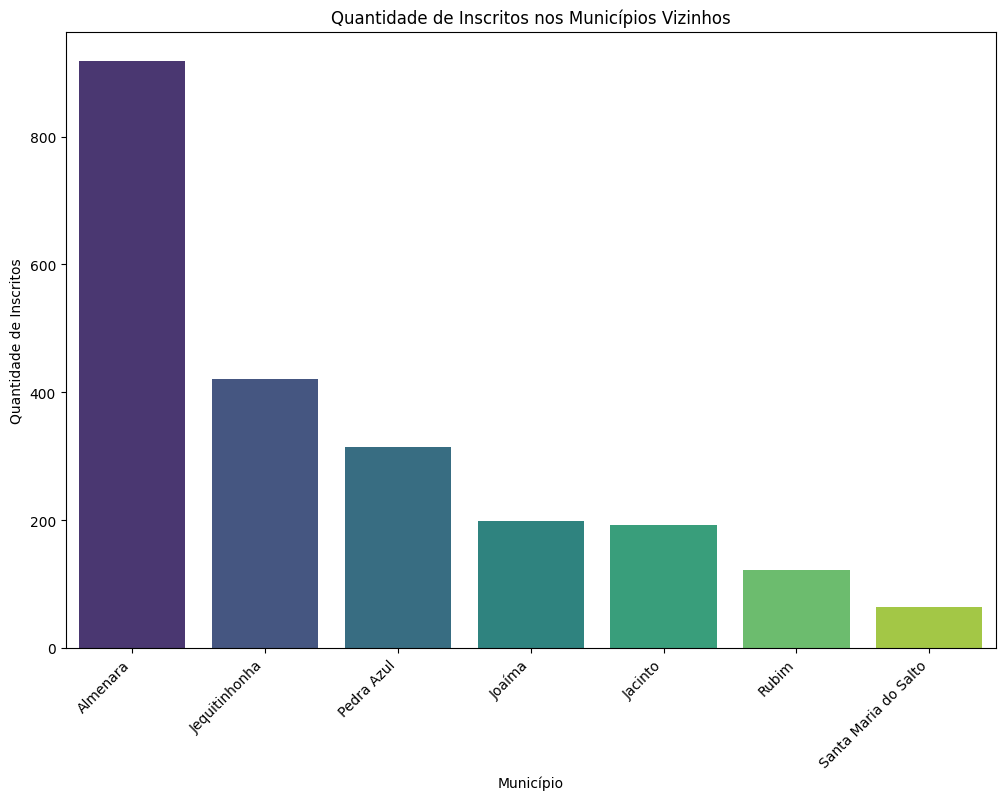

In [ ]:
# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
#df_qtde_participantes.plot(kind='bar')
sns.barplot(x=df_qtde_participantes.index, y=df_qtde_participantes.values, palette='viridis')
plt.title('Quantidade de Inscritos nos Municípios Vizinhos')
plt.xlabel('Município')
plt.ylabel('Quantidade de Inscritos')
plt.xticks(rotation=45, ha='right')
plt.show()

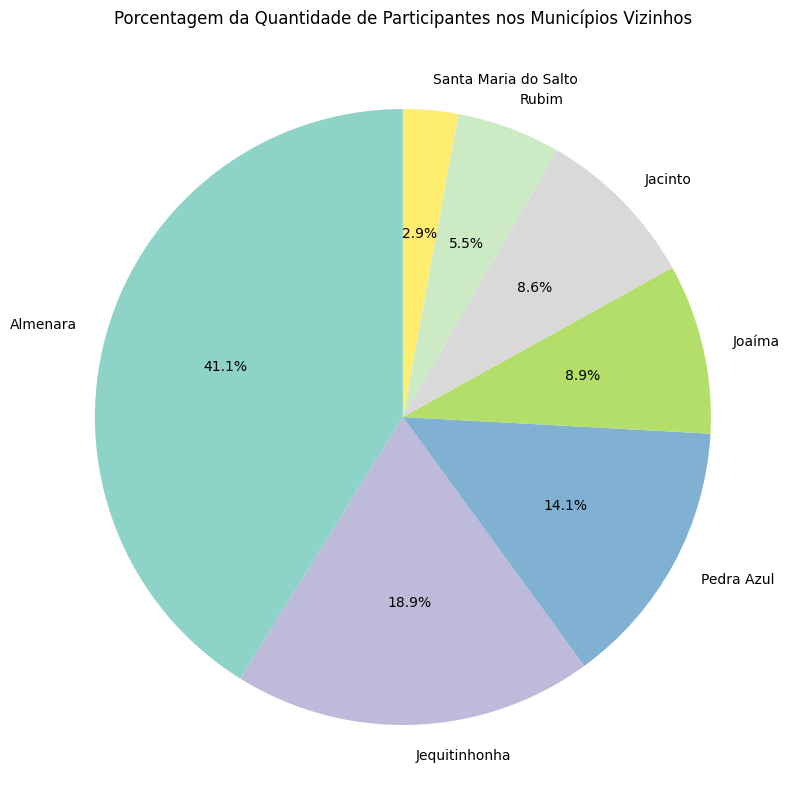

In [ ]:
# Plotando o gráfico de pizza da porcentagem participantes de cada município
# em relacão ao tottal de inscritos dos municípios
plt.figure(figsize=(10, 10))
df_qtde_participantes.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Porcentagem da Quantidade de Participantes nos Municípios Vizinhos')
plt.ylabel('')  # Removendo o rótulo do eixo y
plt.show()

In [ ]:
# Filtrando os inscritos nos municípios
df_municipios_redacao = df[df['NO_MUNICIPIO_RESIDENCIA'].isin(municipios)]

# Filtrando as colunas de nome do município e nota da redação
df_redacao_municipios = df_municipios_redacao[['NO_MUNICIPIO_RESIDENCIA', 'NU_NOTA_REDACAO']]

# Removendo linhas com valores nulos nas notas de redação
df_redacao_municipios = df_redacao_municipios.dropna(subset=['NU_NOTA_REDACAO'])

# Calculando a média das notas de redação por município
df_media_redacao_municipios = df_redacao_municipios.groupby('NO_MUNICIPIO_RESIDENCIA')['NU_NOTA_REDACAO'].mean()

# Ordenando pela média das notas de redação
df_media_redacao_municipios = df_media_redacao_municipios.sort_values(ascending=False)

pd.DataFrame(df_media_redacao_municipios)

,NU_NOTA_REDACAO
NO_MUNICIPIO_RESIDENCIA,
Pedra Azul,562.616822
Almenara,554.986301
Rubim,535.368421
Jacinto,533.648649
Jequitinhonha,510.925926
Santa Maria do Salto,496.250000
Joaíma,492.666667


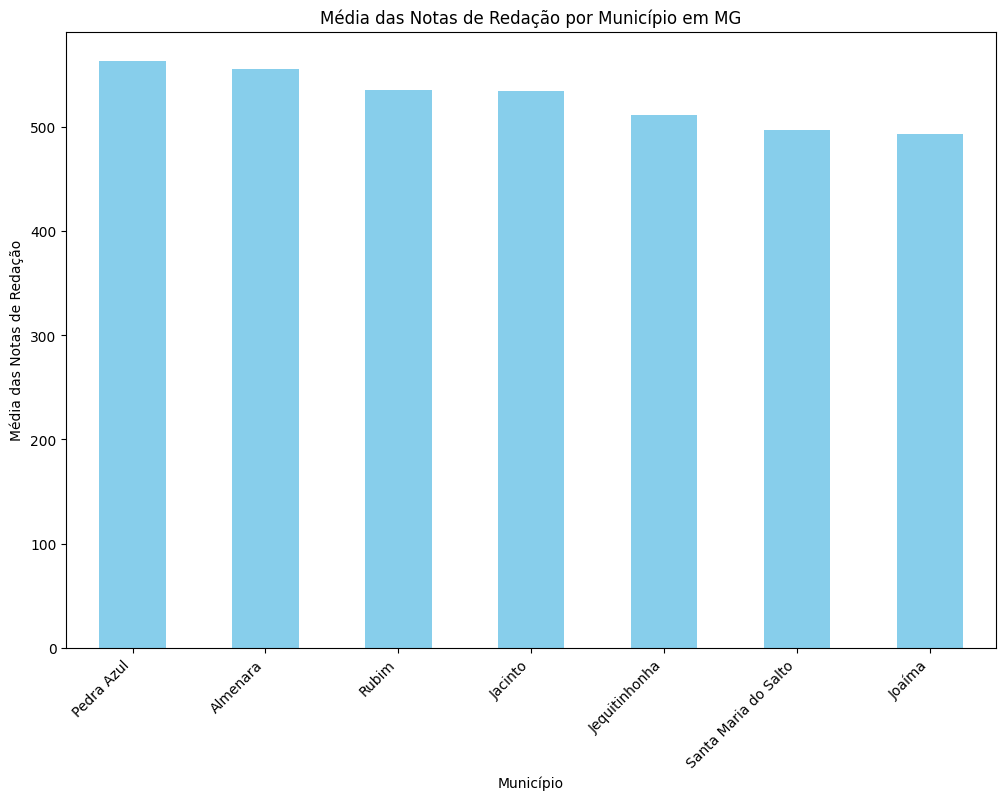

In [ ]:
# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
df_media_redacao_municipios.plot(kind='bar', color='skyblue')
plt.title('Média das Notas de Redação por Município em MG')
plt.xlabel('Município')
plt.ylabel('Média das Notas de Redação')
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo x para melhor visualização
plt.show()

In [ ]:
# Filtrando as colunas de sexo e nota de ciencias da natureza
df_ciencias_natureza = df[['TP_SEXO', 'NU_NOTA_CN']]

# Removendo linhas com valores nulos nas notas de ciências da natureza
df_ciencias_natureza = df_ciencias_natureza.dropna(subset=['NU_NOTA_CN'])

# Calculando a média das notas por sexo
df_media_ciencias_natureza_sexo = df_ciencias_natureza.groupby('TP_SEXO')['NU_NOTA_CN'].mean()

pd.DataFrame(df_media_ciencias_natureza_sexo)


,NU_NOTA_CN
TP_SEXO,
F,469.982003
M,489.316898


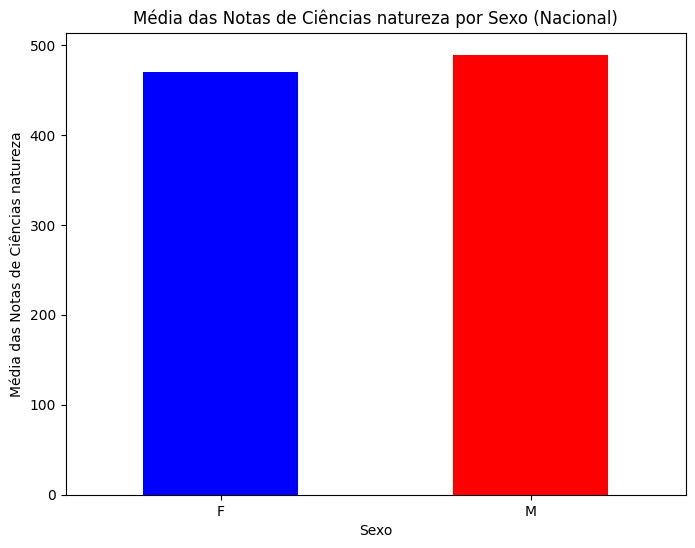

In [ ]:
# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
df_media_ciencias_natureza_sexo.plot(kind='bar', color=['blue', 'red'])
plt.title('Média das Notas de Ciências natureza por Sexo (Nacional)')
plt.xlabel('Sexo')
plt.ylabel('Média das Notas de Ciências natureza')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x para melhor visualização
plt.show()